<a href="https://colab.research.google.com/github/ryota1993/transformersTrial/blob/master/Transformers_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Prepare Environment**

In [1]:
!pip install transformers
!pip install tensorflow==2.0.0
!pip install torch

     |████████████████████████████████| 481kB 4.7MB/s 
     |████████████████████████████████| 870kB 21.8MB/s 
     |████████████████████████████████| 1.0MB 29.8MB/s 
     |████████████████████████████████| 3.1MB 46.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=ceef883ea548be426bbaaddb21040763dc4630511b6d991d27a9bf95cfb95d60
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses
     |████████████████████████████████| 86.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 29.8MB/s 
     |████████████████████████████████| 450kB 42.8MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found exi

In [0]:
import torch
from transformers import *

**2. Load Models,Tokenizers,Pretrained weights**

In [0]:
# To use TensorFlow 2.0 versions of the models, simply prefix the class names with 'TF'
# e.g. `TFRobertaModel` is the TF 2.0 counterpart of the PyTorch model `RobertaModel`

# Transformers has a unified API
# for 10 transformer architectures and 30 pretrained weights.
#          Model          | Tokenizer          | Pretrained weights shortcut
MODELS = [(BertModel,       BertTokenizer,       'bert-base-uncased'),
          (OpenAIGPTModel,  OpenAIGPTTokenizer,  'openai-gpt'),
          (GPT2Model,       GPT2Tokenizer,       'gpt2'),
          (XLNetModel,      XLNetTokenizer,      'xlnet-base-cased'),
          (RobertaModel,    RobertaTokenizer,    'roberta-base'),
         ]

In [4]:
# Let's encode some text in a sequence of hidden-states using each model:
for model_class, tokenizer_class, pretrained_weights in MODELS:
    # Load pretrained model/tokenizer
    tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
    model = model_class.from_pretrained(pretrained_weights)

    # Encode text
    # Add special tokens takes care of adding [CLS], [SEP], <s>...
    # tokens in the right way for each model.
    input_ids = torch.tensor([tokenizer.encode("Here is some text to encode", 
                                               add_special_tokens=True)])  
    
    with torch.no_grad():
        last_hidden_states = model(input_ids)[0]  # Models outputs are now tuples
        print(last_hidden_states)


tensor([[[-0.0549,  0.1053, -0.1065,  ..., -0.3551,  0.0686,  0.6506],
         [-0.5759, -0.3650, -0.1383,  ..., -0.6782,  0.2092, -0.1639],
         [-0.1641, -0.5597,  0.0150,  ..., -0.1603, -0.1346,  0.6216],
         ...,
         [ 0.2448,  0.1254,  0.1587,  ..., -0.2749, -0.1163,  0.8809],
         [ 0.0481,  0.4950, -0.2827,  ..., -0.6097, -0.1212,  0.2527],
         [ 0.9046,  0.2137, -0.5897,  ...,  0.3040, -0.6172, -0.1950]]])


ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.



tensor([[[ 0.8072, -0.1052,  0.1833,  ...,  0.6864, -0.2182, -0.5269],
         [-0.0899,  0.8470, -0.5285,  ...,  0.5059,  0.1572, -0.1086],
         [ 0.3886, -0.0416,  0.1348,  ..., -0.2482, -0.6025,  1.0895],
         ...,
         [ 0.0822,  0.4784,  0.1041,  ..., -0.2069,  0.5582,  0.1837],
         [ 0.0659,  0.2610,  1.2861,  ...,  1.0536, -0.5044,  0.8564],
         [ 0.5544,  0.3624,  0.9268,  ...,  0.1935,  0.0262, -0.3262]]])



tensor([[[-0.0025,  0.0606, -0.3074,  ..., -0.1128, -0.1026, -0.0213],
         [-0.0085,  0.1233,  0.0123,  ...,  0.2896,  0.6784,  0.2019],
         [-0.1504,  0.1876, -0.7935,  ..., -0.0142, -0.1023,  0.0580],
         [-0.4212,  0.2070, -1.7362,  ..., -0.1389, -0.4477, -0.0204],
         [-0.0037, -0.0273, -0.2224,  ..., -0.3865,  0.0549, -0.5796],
         [-0.0419,  0.2079, -1.0730,  ...,  0.0319,  0.2747, -0.5939]]])



tensor([[[ 0.9414, -0.6009, -2.4895,  ..., -3.2332,  0.6658,  0.1112],
         [ 2.2364,  0.5878, -3.9810,  ..., -3.6068,  0.2847,  0.6711],
         [ 2.5582,  1.4524, -3.5307,  ..., -3.3079,  0.4988, -0.4444],
         ...,
         [ 3.6490,  0.0758, -2.1110,  ..., -3.3537,  1.8922,  0.1828],
         [ 4.2504,  1.1375, -3.4154,  ..., -3.1422,  0.5289, -0.2210],
         [ 3.5713,  1.0616, -3.5160,  ..., -2.7221,  0.5865,  0.4205]]])



tensor([[[-0.0348,  0.0970, -0.0241,  ..., -0.0371, -0.0467, -0.0317],
         [ 0.1924, -0.1015,  0.1191,  ...,  0.3618,  0.0325,  0.1019],
         [ 0.3882,  0.1742,  0.2282,  ..., -0.2168,  0.1018,  0.0792],
         ...,
         [ 0.1169, -0.0478, -0.0710,  ..., -0.0456,  0.0219, -0.0802],
         [ 0.0040, -0.0085, -0.0251,  ...,  0.0696,  0.0304, -0.2102],
         [-0.0234,  0.0980, -0.0529,  ..., -0.0746, -0.0472, -0.0702]]])


In [0]:
# Each architecture is provided with several class for fine-tuning on down-stream tasks, e.g.
BERT_MODEL_CLASSES = [BertModel, BertForPreTraining, BertForMaskedLM, BertForNextSentencePrediction,
                      BertForSequenceClassification, BertForTokenClassification, BertForQuestionAnswering]

In [0]:
# All the classes for an architecture can be initiated from pretrained weights for this architecture
# Note that additional weights added for fine-tuning are only initialized
# and need to be trained on the down-stream task
pretrained_weights = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(pretrained_weights)

In [7]:
folderUrl = '/content/drive/My Drive/Transformers'

for model_class in BERT_MODEL_CLASSES:
    # Load pretrained model/tokenizer
    model = model_class.from_pretrained(pretrained_weights)

    # Models can return full list of hidden-states & attentions weights at each layer
    model = model_class.from_pretrained(pretrained_weights,
                                        output_hidden_states=True,
                                        output_attentions=True)
    input_ids = torch.tensor([tokenizer.encode("Let's see all hidden-states and attentions on this text")])
    all_hidden_states, all_attentions = model(input_ids)[-2:]
    print(all_hidden_states)
    print(all_attentions)

    # Models are compatible with Torchscript
    model = model_class.from_pretrained(pretrained_weights, torchscript=True)
    traced_model = torch.jit.trace(model, (input_ids,))

    # Simple serialization for models and tokenizers
    model.save_pretrained(folderUrl)  # save
    model = model_class.from_pretrained(folderUrl)  # re-load
    tokenizer.save_pretrained(folderUrl)  # save
    tokenizer = BertTokenizer.from_pretrained(folderUrl)  # re-load

ストリーミング出力は最後の 5000 行に切り捨てられました。
         [[2.2946e-02, 9.4161e-03, 6.8299e-03,  ..., 3.4791e-02,
           1.0114e-02, 8.6674e-01],
          [1.9876e-03, 1.5420e-03, 4.0654e-05,  ..., 3.1911e-04,
           6.2792e-04, 9.9472e-01],
          [1.7686e-01, 1.1313e-01, 9.6419e-03,  ..., 5.9253e-03,
           2.8271e-02, 6.2312e-01],
          ...,
          [1.3517e-02, 6.1267e-04, 5.8444e-04,  ..., 4.4026e-02,
           1.3053e-02, 8.4771e-01],
          [2.5264e-02, 2.5805e-03, 3.5940e-03,  ..., 1.0913e-02,
           2.2198e-02, 8.8607e-01],
          [7.8666e-03, 1.9762e-03, 5.4771e-04,  ..., 2.9423e-03,
           1.2665e-03, 9.7409e-01]],

         [[3.9607e-02, 1.3948e-02, 2.1784e-03,  ..., 1.3839e-02,
           5.6719e-02, 8.0466e-01],
          [3.6966e-02, 5.5213e-02, 9.0026e-03,  ..., 1.3837e-01,
           3.2262e-01, 1.8601e-01],
          [4.0335e-02, 1.8161e-01, 3.6445e-02,  ..., 1.6486e-01,
           1.8672e-01, 1.0761e-01],
          ...,
          [8.8513e-02, 1.50

In [8]:
encodedText = tokenizer.encode("This is to see how Transformers works")

encodedText

[101, 2023, 2003, 2000, 2156, 2129, 19081, 2573, 102]

**3. Tensorflow 2.0 training and Pytorch interoperability**

In [9]:
import tensorflow as tf
import tensorflow_datasets

tf.__version__

'2.0.0'

In [10]:
# Load dataset, tokenizer, model from pretrained model/vocabulary
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-cased')
data = tensorflow_datasets.load('glue/mrpc')

data

INFO:absl:Load pre-computed datasetinfo (eg: splits) from bucket.
INFO:absl:Loading info from GCS for glue/mrpc/1.0.0
INFO:absl:Field info.description from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.location from disk and from code do not match. Keeping the one from code.
INFO:absl:Generating dataset glue (/root/tensorflow_datasets/glue/mrpc/1.0.0)


INFO:absl:Downloading https://firebasestorage.googleapis.com/v0/b/mtl-sentence-representations.appspot.com/o/data%2Fmrpc_dev_ids.tsv?alt=media&token=ec5c0836-31d5-48f4-b431-7480817f1adc into /root/tensorflow_datasets/downloads/fire.goog.com_v0_b_mtl-sent-repr.apps.com_o_2FjSIMlCiqs1QSmIykr4IRPnEHjPuGwAz5i40v8K9U0Z8.tsvalt=media&token=ec5c0836-31d5-48f4-b431-7480817f1adc.tmp.6f468cdbe9744d50a60fd304712d7522...
INFO:absl:Downloading https://dl.fbaipublicfiles.com/senteval/senteval_data/msr_paraphrase_train.txt into /root/tensorflow_datasets/downloads/dl.fbaip.com_sente_sente_msr_parap_trainfGxPZuQWGBti4Tbd1YNOwQr-OqxPejJ7gcp0Al6mlSk.txt.tmp.b1847a67f78e43129a053f9168f0143a...
INFO:absl:Downloading https://dl.fbaipublicfiles.com/senteval/senteval_data/msr_paraphrase_test.txt into /root/tensorflow_datasets/downloads/dl.fbaip.com_sente_sente_msr_parap_test0PdekMcyqYR-w4Rx_d7OTryq0J3RlYRn4rAMajy9Mak.txt.tmp.f78648e159b144a49c2afc749b468a80...
/usr/local/lib/python3.6/dist-packages/urllib3/co

Shuffling and writing examples to /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteFA9D8W/glue-train.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteFA9D8W/glue-train.tfrecord. Shard lengths: [3668]
INFO:absl:Generating split validation


Shuffling and writing examples to /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteFA9D8W/glue-validation.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteFA9D8W/glue-validation.tfrecord. Shard lengths: [408]
INFO:absl:Generating split test


Shuffling and writing examples to /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteFA9D8W/glue-test.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteFA9D8W/glue-test.tfrecord. Shard lengths: [1725]
INFO:absl:Skipping computing stats for mode ComputeStatsMode.AUTO.
INFO:absl:Constructing tf.data.Dataset for split None, from /root/tensorflow_datasets/glue/mrpc/1.0.0


Dataset glue downloaded and prepared to /root/tensorflow_datasets/glue/mrpc/1.0.0. Subsequent calls will reuse this data.


{'test': <DatasetV1Adapter shapes: {idx: (), label: (), sentence1: (), sentence2: ()}, types: {idx: tf.int32, label: tf.int64, sentence1: tf.string, sentence2: tf.string}>,
 'train': <DatasetV1Adapter shapes: {idx: (), label: (), sentence1: (), sentence2: ()}, types: {idx: tf.int32, label: tf.int64, sentence1: tf.string, sentence2: tf.string}>,
 'validation': <DatasetV1Adapter shapes: {idx: (), label: (), sentence1: (), sentence2: ()}, types: {idx: tf.int32, label: tf.int64, sentence1: tf.string, sentence2: tf.string}>}

In [0]:
# Prepare dataset for GLUE as a tf.data.Dataset instance
train_dataset = glue_convert_examples_to_features(data['train'], tokenizer, max_length=128, task='mrpc')
valid_dataset = glue_convert_examples_to_features(data['validation'], tokenizer, max_length=128, task='mrpc')
train_dataset = train_dataset.shuffle(100).batch(32).repeat(2)
valid_dataset = valid_dataset.batch(64)

In [0]:
# Prepare training: Compile tf.keras model with optimizer, loss and learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [13]:
# Train and evaluate using tf.keras.Model.fit()
history = model.fit(train_dataset, epochs=2, steps_per_epoch=50,
                    validation_data=valid_dataset, validation_steps=4)

Train for 50 steps, validate for 4 steps
Epoch 1/2
50/50 [==============================] - 1448s 29s/step - loss: 0.5974 - accuracy: 0.7006 - val_loss: 0.5002 - val_accuracy: 0.7734
Epoch 2/2
50/50 [==============================] - 1419s 28s/step - loss: 0.5121 - accuracy: 0.7625 - val_loss: 0.4089 - val_accuracy: 0.8320


In [0]:
# Load the TensorFlow model in PyTorch for inspection
model.save_pretrained(folderUrl)
pytorch_model = BertForSequenceClassification.from_pretrained(folderUrl, from_tf=True)

**4. Inspection of trained model with Pytorch**

In [15]:
# Quickly test a few predictions - MRPC is a paraphrasing task, let's see if our model learned the task
sentence_0 = "This research was consistent with his findings."
sentence_1 = "His findings were compatible with this research."
sentence_2 = "His findings were not compatible with this research."

inputs_1 = tokenizer.encode_plus(sentence_0, sentence_1, add_special_tokens=True, return_tensors='pt')
inputs_2 = tokenizer.encode_plus(sentence_0, sentence_2, add_special_tokens=True, return_tensors='pt')

inputs_1

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'input_ids': tensor([[  101,  1188,  1844,  1108,  8080,  1114,  1117,  9505,   119,   102,
           1230,  9505,  1127, 12173,  1114,  1142,  1844,   119,   102]]),
 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [16]:
pred_1 = pytorch_model(inputs_1['input_ids'],
                       token_type_ids=inputs_1['token_type_ids'])[0].argmax().item()
pred_2 = pytorch_model(inputs_2['input_ids'],
                       token_type_ids=inputs_2['token_type_ids'])[0].argmax().item()

print("sentence_1 is", "a paraphrase" if pred_1 else "not a paraphrase", "of sentence_0")
print("sentence_2 is", "a paraphrase" if pred_2 else "not a paraphrase", "of sentence_0")

sentence_1 is a paraphrase of sentence_0
sentence_2 is a paraphrase of sentence_0


【Reference】<br>
・Quick Tour Transformer Guide<br>
https://github.com/huggingface/transformers

**【注意点】**<br>
・Gdriveのマウント方法<br>
 1. Code as below:<br>from google.colab import drive<br>
drive.mount('/content/drive')<br>

OR<br>

 2. "ドライブをマウント"を選択<br>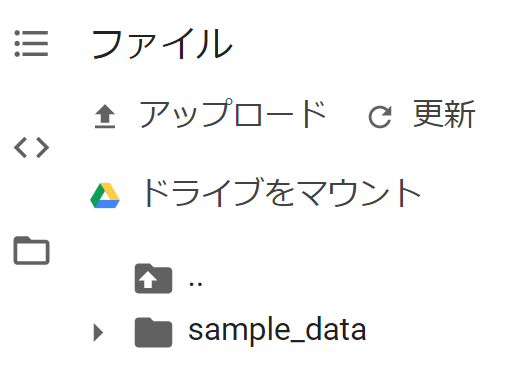

・ColabのGPU設定:<br>
> "編集"→"ノートブックの設定"<br>


  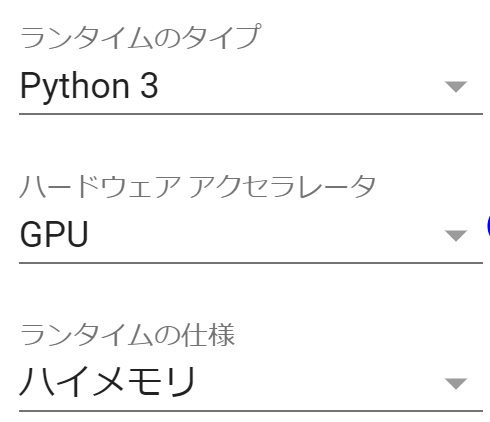